# 9A_omim_enrichment

01/21/2020
get omim enrichment

monogenic vs polygenic diseases

updated with psych encode eqtl genes

In [2]:
import pandas as pd
import os, glob
import re


In [3]:
save_dir = 'omim_enrichment/'

# A. Preprocessing

## 1 polygenic mpra egene disease_files

In [4]:
dz_to_abbr_dict = {
    'schizo':'SCZ',
    'bipolar':'BPD',
    'personality':'BPLD',
    'traum':'PTSD',
    'anxiety':'GAD',
    'depress':'MDD',
    'ocd':'OCD',
    'panic':'PD',
    'autism':'ASD',
    'attent':'ADHD',
}

In [5]:
# polygenic genesets
gene_files = glob.glob('D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/*txt')
gene_files

['D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/all.txt',
 'D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/BPD.txt',
 'D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/PTSD.txt',
 'D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/SCZ.txt',
 'D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/ASD.txt',
 'D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/BLPD.txt',
 'D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/MDD.txt',
 'D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/OCD.txt',
 'D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/PD.txt',
 'D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/GAD.txt',
 'D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/ADHD.txt']

In [6]:
polydz_to_geneset = {}
for file in sorted(gene_files):
    dz = os.path.basename(file).split('.')[0]
    polydz_to_geneset[dz] = sorted(set(pd.read_table(file, header=None).iloc[:,0]))
    print(dz, len(polydz_to_geneset[dz]) )

ADHD 67
ASD 2
BLPD 24
BPD 180
GAD 30
MDD 129
OCD 28
PD 4
PTSD 9
SCZ 433
all 619


## 2. monogenic disease file preprocessing

In [7]:
omim_dir = '/Users/mguo123/Google Drive/0_altman/db/omim/20210121/'
glob.glob(omim_dir+'*')

['/Users/mguo123/Google Drive/0_altman/db/omim/20210121/Icon\r',
 '/Users/mguo123/Google Drive/0_altman/db/omim/20210121/mim2gene.txt',
 '/Users/mguo123/Google Drive/0_altman/db/omim/20210121/genemap2.txt',
 '/Users/mguo123/Google Drive/0_altman/db/omim/20210121/mimTitles.txt',
 '/Users/mguo123/Google Drive/0_altman/db/omim/20210121/morbidmap.txt']

In [11]:
mim2gene = pd.read_table(os.path.join(omim_dir, 'mim2gene.txt'), header=4).dropna()
num_omim_genes = mim2gene['Approved Gene Symbol (HGNC)'].unique().shape#15999 

In [12]:
# with open(os.path.join(omim_dir, 'morbidmap.txt'), 'r') as f:
#     for idx, line in enumerate(f.readlines()):
#         print(line.strip().split('\t'))

In [13]:
morbid_map = pd.read_table(os.path.join(omim_dir, 'morbidmap.txt'), header=3).dropna()
# Clean number ids and braces
morbid_map['phenotype_cleaned'] = morbid_map['# Phenotype'].apply(lambda x: re.split(', [0-9]',x)[0].strip('{}?')).to_list()
# Clean first #s for grouping
morbid_map['phenotype_cleaned2'] = morbid_map.phenotype_cleaned.apply(lambda x: re.sub(r'[,()\d]+$', '', x.strip()).strip()).to_list()
# Clearn more for grouping
morbid_map['phenotype_cleaned3'] = morbid_map['phenotype_cleaned2'].apply(lambda str_disease: 
                                       ' '.join([ x.strip(', ()') for x in str_disease.split(' ') if not x.strip(', ()').isnumeric()])).to_list()

print(morbid_map.shape, morbid_map.phenotype_cleaned.unique().shape,
      morbid_map.phenotype_cleaned2.unique().shape, morbid_map.phenotype_cleaned3.unique().shape)

(8052, 7) (6873,) (5291,) (4797,)


manually pick neuro relevant monogenic diseases

In [14]:
with open('omim_enrichment/phenotype_cleaned3_all.txt','w') as f:
    for x in sorted(morbid_map.phenotype_cleaned3.unique()):
        f.write(x+'\n')

in the meantime get diseases --> gene lists

In [15]:
morbid_map[:5]

,# Phenotype,Gene Symbols,MIM Number,Cyto Location,phenotype_cleaned,phenotype_cleaned2,phenotype_cleaned3
0,"17,20-lyase deficiency, isolated, 202110 (3)","CYP17A1, CYP17, P450C17",609300.0,10q24.32,"17,20-lyase deficiency, isolated","17,20-lyase deficiency, isolated","17,20-lyase deficiency isolated"
1,"17-alpha-hydroxylase/17,20-lyase deficiency, 2...","CYP17A1, CYP17, P450C17",609300.0,10q24.32,"17-alpha-hydroxylase/17,20-lyase deficiency","17-alpha-hydroxylase/17,20-lyase deficiency","17-alpha-hydroxylase/17,20-lyase deficiency"
2,"2,4-dienoyl-CoA reductase deficiency, 616034 (3)","NADK2, C5orf33, DECRD",615787.0,5p13.2,"2,4-dienoyl-CoA reductase deficiency","2,4-dienoyl-CoA reductase deficiency","2,4-dienoyl-CoA reductase deficiency"
3,"2-aminoadipic 2-oxoadipic aciduria, 204750 (3)","DHTKD1, KIAA1630, AMOXAD, CMT2Q",614984.0,10p14,2-aminoadipic 2-oxoadipic aciduria,2-aminoadipic 2-oxoadipic aciduria,2-aminoadipic 2-oxoadipic aciduria
4,"2-methylbutyrylglycinuria, 610006 (3)","ACADSB, SBCAD",600301.0,10q26.13,2-methylbutyrylglycinuria,2-methylbutyrylglycinuria,2-methylbutyrylglycinuria


In [16]:
morbid_map_grouped = morbid_map.groupby('phenotype_cleaned3').agg({'Gene Symbols': lambda arr: ', '.join(arr),
                                            'MIM Number': lambda arr: '|'.join([str(int(x)) for x in arr]),
                                            'Cyto Location': lambda arr: '|'.join(arr)}).reset_index()
print(morbid_map_grouped.shape)
morbid_map_grouped[:5]

(4797, 4)


,phenotype_cleaned3,Gene Symbols,MIM Number,Cyto Location
0,"17,20-lyase deficiency isolated","CYP17A1, CYP17, P450C17",609300,10q24.32
1,"17-alpha-hydroxylase/17,20-lyase deficiency","CYP17A1, CYP17, P450C17",609300,10q24.32
2,"2,4-dienoyl-CoA reductase deficiency","NADK2, C5orf33, DECRD",615787,5p13.2
3,2-aminoadipic 2-oxoadipic aciduria,"DHTKD1, KIAA1630, AMOXAD, CMT2Q",614984,10p14
4,2-methylbutyrylglycinuria,"ACADSB, SBCAD",600301,10q26.13


In [17]:
morbid_map_grouped['geneset'] = morbid_map_grouped['Gene Symbols'].apply(lambda x: sorted(set(x.split(', '))))
morbid_map_grouped['len_geneset'] = morbid_map_grouped.geneset.map(len)
morbid_map_grouped.sort_values('len_geneset', ascending=False)

,phenotype_cleaned3,Gene Symbols,MIM Number,Cyto Location,geneset,len_geneset
1219,Developmental and epileptic encephalopathy,"ST3GAL3, SIAT6, ST3GALII, MRT12, DEE15, GUF1, ...",606494|617064|610044|603709|618904|154200|3003...,1p34.1|4p12|1q31.3|7q21.12|3p21.31|2p15|Xp21.3...,"[AARS, AARS1, ACTL6B, ADAM22, ALG13, AP3B2, AR...",280
3853,Retinitis pigmentosa,"OFD1, CXorf5, SGBS2, JBTS10, RP23, TTC8, BBS8,...",300170|608132|613598|180290|604043|614068|6002...,Xp22.2|14q31.3|2p23.3|10q11.22|1q32.3|14q24.3|...,"[ABCA4, ABCR, AC133, AGBL5, AHR, ANT1, ARFL3, ...",240
1165,Deafness autosomal recessive,"GRXCR2, DFNB101, EPS8, DFNB102, CLIC5, DFNB103...",615762|600206|607293|611410|602336|612959|6031...,5q32|12p12.3|6p21.1|6p22.3|1p31.3|8q22.1|14q12...,"[ADCY1, AUNB1, BDP1, C19orf46, C21orf29, C6orf...",211
620,Cardiomyopathy dilated,"EYA4, DFNA10, CMD1J, CSRP3, CRP3, CLP, CMD1M, ...",603550|600824|191044|614518|150330|102573|1256...,6q23.2|11p15.1|19q13.42|7q21.2|1q22|1q43|18q12...,"[ABCC9, ACNINV3, ACTC1, ACTN2, AD3, AD4, ARVC1...",165
2133,Immunodeficiency,"UNC119, HRG4, IMD13, TNFRSF4, TXGP1L, OX40, AC...",604011|600315|153390|186780|603517|605047|6023...,17q11.2|1p36.33|1p35.2|1q24.2|1p22.3|11p15.5|2...,"[ACT35, ADMIO2, AGM1, AGM7, AGMX2, AMKL, APDS,...",160
...,...,...,...,...,...,...
3793,Radial ray deficiency,RRDX,300378,Xq24-q25,[RRDX],1
589,CPT deficiency hepatic type IA,CPT1A,600528,11q13.3,[CPT1A],1
3049,Narcolepsy 5},NRCLP5,612851,14q11.2,[NRCLP5],1
3048,Narcolepsy 4},NRCLP4,612417,22q13,[NRCLP4],1


In [18]:
display(morbid_map_grouped[morbid_map_grouped.phenotype_cleaned3.str.lower().str.contains('person')])
list_lists = morbid_map_grouped[morbid_map_grouped.phenotype_cleaned3.str.lower().str.contains('person')].geneset.to_list()
sorted(set([l for sublist in list_lists for l in sublist]    ))




,phenotype_cleaned3,Gene Symbols,MIM Number,Cyto Location,geneset,len_geneset
267,Anxiety-related personality traits,"SLC6A4, HTT, OCD1",182138,17q11.2,"[HTT, OCD1, SLC6A4]",3


['HTT', 'OCD1', 'SLC6A4']

In [12]:
morbid_map_grouped.to_csv(os.path.join(save_dir, 'morbid_map_grouped_cleaned3.csv'))

## 3. combine gene set lists

In [19]:
monodz_to_geneset = pd.Series(morbid_map_grouped.geneset.values, index=morbid_map_grouped.phenotype_cleaned3).to_dict()


In [20]:
# takes a while (5000*10 = 50,000 rows)
mono_poly_dz_df = pd.DataFrame(columns=['mono_dz','polydz','mono_geneset', 'poly_geneset','len_mono', 'len_poly'])
idx = 0
for polydz, poly_geneset in polydz_to_geneset.items():
    for mono_dz, mono_geneset in monodz_to_geneset.items():
        mono_poly_dz_df.at[idx, 'mono_dz'] = mono_dz
        mono_poly_dz_df.at[idx, 'polydz'] = polydz
        mono_poly_dz_df.at[idx, 'mono_geneset'] = mono_geneset
        mono_poly_dz_df.at[idx, 'poly_geneset'] = poly_geneset
        mono_poly_dz_df.at[idx, 'len_mono'] = len(mono_geneset)
        mono_poly_dz_df.at[idx, 'len_poly'] = len(poly_geneset)
        idx+=1

KeyboardInterrupt: 

In [ ]:
mono_poly_dz_df['len_overlap'] = mono_poly_dz_df.apply(lambda row: len(set(row.mono_geneset).intersection(row.poly_geneset)),axis=1)

In [ ]:
mono_poly_dz_df_filt = mono_poly_dz_df[mono_poly_dz_df.len_overlap!=0].sort_values('len_overlap',ascending=False)
mono_poly_dz_df_filt.shape, mono_poly_dz_df.shape 

# if don't want to do big compute then just load in saved version

In [8]:
import ast
mono_poly_dz_df = pd.read_csv(os.path.join(save_dir,'mono_poly_dz_df_filt.csv'),index_col=0)
mono_poly_dz_df_filt = mono_poly_dz_df[mono_poly_dz_df.len_overlap!=0].sort_values('len_overlap',ascending=False)
mono_poly_dz_df_filt['mono_geneset'] = mono_poly_dz_df_filt['mono_geneset'].apply(lambda x: ast.literal_eval(x))
mono_poly_dz_df_filt['poly_geneset'] = mono_poly_dz_df_filt['poly_geneset'].apply(lambda x: ast.literal_eval(x))
mono_poly_dz_df_filt['overlap'] = mono_poly_dz_df_filt.apply(lambda row: '|'.join(sorted(set(row.mono_geneset).intersection(row.poly_geneset))),axis=1)# mono_poly_dz_df_filt['intersect_genes'] = mono_poly_dz_df_filt.apply(lambda x:
#                                                                     set(x['mono_geneset']).intersectio

In [9]:
mono_poly_dz_df_filt

,mono_dz,poly_dz,mono_geneset,poly_geneset,len_mono,len_poly,polydz,len_overlap,hypergeom_pval,pval_adj,poly_dz_abbr,overlap
1219,Developmental and epileptic encephalopathy,NaN,"[AARS, AARS1, ACTL6B, ADAM22, ALG13, AP3B2, AR...","[AADAT, ABCB9, ABCC8, ABHD16A, ABT1, ACADM, AC...",280,429,all,3,0.923193,1.0,NaN,AP3B2|PIGQ|SZT2
44817,Galloway-Mowat syndrome,NaN,"[FLJ20411, GAMOS1, GAMOS3, GAMOS4, GAMOS5, GAM...","[ABCB9, ABCC8, ABHD16A, ABT1, AGER, AGT, AIF1,...",21,308,schizo,2,0.036508,1.0,SCZ,TPRKB|WDR73
1644,Galloway-Mowat syndrome,NaN,"[FLJ20411, GAMOS1, GAMOS3, GAMOS4, GAMOS5, GAM...","[AADAT, ABCB9, ABCC8, ABHD16A, ABT1, ACADM, AC...",21,429,all,2,0.066043,1.0,NaN,TPRKB|WDR73
4075,Spastic paraplegia autosomal recessive,NaN,"[ALS5, AP4B1, AP4E1, AP4M1, AP4S1, AP5Z1, ARL6...","[AADAT, ABCB9, ABCC8, ABHD16A, ABT1, ACADM, AC...",137,429,all,2,0.765868,1.0,NaN,DDHD2|NT5C2
2283,Joubert syndrome,NaN,"[3H11AG, ACLS, AGBK, AHI1, ALS2CR4, ARFL3, ARL...","[AADAT, ABCB9, ABCC8, ABHD16A, ABT1, ACADM, AC...",127,429,all,2,0.728285,1.0,NaN,ARL3|SUFU
...,...,...,...,...,...,...,...,...,...,...,...,...
47281,Spinocerebellar ataxia,NaN,"[ADMD, AFG3L2, ASL13, ATX1, ATX2, ATXN1, ATXN1...","[ABCB9, ABCC8, ABHD16A, ABT1, AGER, AGT, AIF1,...",124,308,schizo,1,0.836493,1.0,SCZ,ATXN7
45886,Mental retardation autosomal recessive,NaN,"[2E4, ADAT3, ANK3, BB1, BSSP3, C12orf4, C17orf...","[ABCB9, ABCC8, ABHD16A, ABT1, AGER, AGT, AIF1,...",151,308,schizo,1,0.889928,1.0,SCZ,ANK3
4108,Spinocerebellar ataxia,NaN,"[ADMD, AFG3L2, ASL13, ATX1, ATX2, ATXN1, ATXN1...","[AADAT, ABCB9, ABCC8, ABHD16A, ABT1, ACADM, AC...",124,429,all,1,0.920311,1.0,NaN,ATXN7
2713,Mental retardation autosomal recessive,NaN,"[2E4, ADAT3, ANK3, BB1, BSSP3, C12orf4, C17orf...","[AADAT, ABCB9, ABCC8, ABHD16A, ABT1, ACADM, AC...",151,429,all,1,0.954151,1.0,NaN,ANK3


In [10]:
mono_poly_dz_df_filt.mono_dz.unique().shape

(58,)

In [11]:
# sorted(mono_poly_dz_df_filt.mono_dz.unique())

In [12]:
filt_list_monodz = [
 'Aicardi-Goutieres syndrome',
 'Al Kaissi syndrome',
 'Amyotrophic lateral sclerosis susceptibility to',
 'Birk-Landau-Perez syndrome',
 'CATSHL syndrome',
 'Charcot-Marie-Tooth disease axonal type 2A2A',
 'Charcot-Marie-Tooth disease axonal type 2A2B',
 'Charcot-Marie-Tooth disease axonal type 2U',
 'Charcot-Marie-Tooth disease axonal type 2W',
#  'Codeine sensitivity',
 'Creutzfeldt-Jakob disease variant resistance to',
 'Developmental and epileptic encephalopathy',
#  'Dystonia-1 modifier of}',
#  'Dystonia-1 torsion',
 'Encephalitis/encephalopathy mild with reversible myelin vacuolization',
 'Encephalocraniocutaneous lipomatosis somatic mosaic',
 'Encephalopathy acute infection-induced herpes-specific susceptibility to',
 'Epilepsy nocturnal frontal lobe type',
 'Galloway-Mowat syndrome',
 'Gaze palsy familial horizontal with progressive scoliosis',
 'Glioblastoma somatic',
 'Hartsfield syndrome',
 'Hereditary motor and sensory neuropathy VIA',
 'Holoprosencephaly with or without pancreatic agenesis',
 'Homocystinuria due to MTHFR deficiency',
 'Hyperphosphatasia with mental retardation syndrome',
 'Hypersensitivity syndrome carbamazepine-induced susceptibility to',
 'Hypomagnesemia seizures and mental retardation',
 'Infantile cerebellar-retinal degeneration',
 'Intellectual developmental disorder autosomal recessive',
 'Joubert syndrome',
 'Lissencephaly',
 'Medulloblastoma desmoplastic',
 'Meningioma familial susceptibility to',
 'Menke-Hennekam syndrome',
 'Mental retardation autosomal recessive',
 'Mirror movements and/or agenesis of the corpus callosum',
 'Muenke syndrome',
 'Myoclonus familial',
 'Nestor-Guillermo progeria syndrome',
 'Neural tube defects folate-sensitive susceptibility to',
 'Neural tube defects susceptibility to',
 'Neurodevelopmental disorder with absent language and variable seizures',
 'Neurodevelopmental disorder with dysmorphic facies impaired speech and hypotonia',
 'Neurodevelopmental disorder with microcephaly cortical malformations and spasticity',
 'Neurodevelopmental disorder with microcephaly seizures and cortical atrophy',
 'Neurodevelopmental disorder with or without anomalies of the brain eye or heart',
 'Neuropathy hereditary sensory and autonomic type IA',
 'Parkinson disease autosomal recessive early-onset',
 'Pituitary adenoma ACTH-secreting somatic',
 'Pontocerebellar hypoplasia type',
 'Proteus syndrome somatic',
 'Rubinstein-Taybi syndrome',
 'SADDAN',
 'Short stature brachydactyly intellectual developmental disability and seizures',
 'Short stature developmental delay and congenital heart defects',
 'Spastic paraplegia autosomal recessive',
 'Spinocerebellar ataxia',
 'Thauvin-Robinet-Faivre syndrome',
 'Trigonocephaly',
 'Vissers-Bodmer syndrome']

In [17]:
for x in filt_list_monodz:
    print(x)

Aicardi-Goutieres syndrome
Al Kaissi syndrome
Amyotrophic lateral sclerosis susceptibility to
Birk-Landau-Perez syndrome
CATSHL syndrome
Charcot-Marie-Tooth disease axonal type 2A2A
Charcot-Marie-Tooth disease axonal type 2A2B
Charcot-Marie-Tooth disease axonal type 2U
Charcot-Marie-Tooth disease axonal type 2W
Creutzfeldt-Jakob disease variant resistance to
Developmental and epileptic encephalopathy
Encephalitis/encephalopathy mild with reversible myelin vacuolization
Encephalocraniocutaneous lipomatosis somatic mosaic
Encephalopathy acute infection-induced herpes-specific susceptibility to
Epilepsy nocturnal frontal lobe type
Galloway-Mowat syndrome
Gaze palsy familial horizontal with progressive scoliosis
Glioblastoma somatic
Hartsfield syndrome
Hereditary motor and sensory neuropathy VIA
Holoprosencephaly with or without pancreatic agenesis
Homocystinuria due to MTHFR deficiency
Hyperphosphatasia with mental retardation syndrome
Hypersensitivity syndrome carbamazepine-induced susce

In [13]:
len(filt_list_monodz)

58

In [15]:
mono_poly_dz_df_filt_neuro = mono_poly_dz_df_filt[mono_poly_dz_df_filt.mono_dz.isin(filt_list_monodz)]
mono_poly_dz_df_filt.shape, mono_poly_dz_df_filt_neuro.shape 

((133, 12), (133, 12))

In [21]:
mono_poly_dz_df_filt_neuro[['mono_dz','mono_geneset']].reset_index(drop='True').to_csv(os.path.join(save_dir, 'mono_dz.csv')) # suppl table

In [32]:
# [item for sublist in t for item in sublist]
mono_geneset_all = set([x for sublist in mono_poly_dz_df.mono_geneset.to_list() for x in sublist])
mono_geneset = set([x for sublist in mono_poly_dz_df_filt_neuro.mono_geneset.to_list() for x in sublist])
poly_genes = set(polydz_to_geneset['all'])
print(len(mono_geneset_all),len(mono_geneset), len(poly_genes),len(mono_geneset.intersection(poly_genes)))
hypergeometric(len(mono_geneset.intersection(poly_genes)),
               15999,#number omim genes,#num_genes_universe,  
               len(poly_genes), len(mono_geneset))

47 1109 619 51


0.1119341674396917

In [33]:
mono_poly_dz_df_filt_neuro.sort_values('len_mono',ascending=False)[:20]

,mono_dz,poly_dz,mono_geneset,poly_geneset,len_mono,len_poly,polydz,len_overlap,hypergeom_pval,pval_adj,poly_dz_abbr,overlap
1219,Developmental and epileptic encephalopathy,NaN,"[AARS, AARS1, ACTL6B, ADAM22, ALG13, AP3B2, AR...","[AADAT, ABCB9, ABCC8, ABHD16A, ABT1, ACADM, AC...",280,429,all,3,0.923193,1.0,NaN,AP3B2|PIGQ|SZT2
49189,Developmental and epileptic encephalopathy,NaN,"[AARS, AARS1, ACTL6B, ADAM22, ALG13, AP3B2, AR...","[AP3B2, BOLA3, BOLA3-AS1, MTHFD2, TADA1]",280,5,traum,1,0.064011,1.0,PTSD,AP3B2
10813,Developmental and epileptic encephalopathy,NaN,"[AARS, AARS1, ACTL6B, ADAM22, ALG13, AP3B2, AR...","[ACADM, AGT, ARL3, AS3MT, CALHM2, CCDC78, CCHC...",280,46,attent,1,0.456203,1.0,ADHD,PIGQ
44392,Developmental and epileptic encephalopathy,NaN,"[AARS, AARS1, ACTL6B, ADAM22, ALG13, AP3B2, AR...","[ABCB9, ABCC8, ABHD16A, ABT1, AGER, AGT, AIF1,...",280,308,schizo,1,0.983499,1.0,SCZ,SZT2
45886,Mental retardation autosomal recessive,NaN,"[2E4, ADAT3, ANK3, BB1, BSSP3, C12orf4, C17orf...","[ABCB9, ABCC8, ABHD16A, ABT1, AGER, AGT, AIF1,...",151,308,schizo,1,0.889928,1.0,SCZ,ANK3
2713,Mental retardation autosomal recessive,NaN,"[2E4, ADAT3, ANK3, BB1, BSSP3, C12orf4, C17orf...","[AADAT, ABCB9, ABCC8, ABHD16A, ABT1, ACADM, AC...",151,429,all,1,0.954151,1.0,NaN,ANK3
26698,Mental retardation autosomal recessive,NaN,"[2E4, ADAT3, ANK3, BB1, BSSP3, C12orf4, C17orf...","[ACO2, ADAMTS2, ANK3, ATP6V1D, CAST, CCDC122, ...",151,55,depress,1,0.324081,1.0,MDD,ANK3
47248,Spastic paraplegia autosomal recessive,NaN,"[ALS5, AP4B1, AP4E1, AP4M1, AP4S1, AP5Z1, ARL6...","[ABCB9, ABCC8, ABHD16A, ABT1, AGER, AGT, AIF1,...",137,308,schizo,2,0.591493,1.0,SCZ,DDHD2|NT5C2
4075,Spastic paraplegia autosomal recessive,NaN,"[ALS5, AP4B1, AP4E1, AP4M1, AP4S1, AP5Z1, ARL6...","[AADAT, ABCB9, ABCC8, ABHD16A, ABT1, ACADM, AC...",137,429,all,2,0.765868,1.0,NaN,DDHD2|NT5C2
11877,Joubert syndrome,NaN,"[3H11AG, ACLS, AGBK, AHI1, ALS2CR4, ARFL3, ARL...","[ACADM, AGT, ARL3, AS3MT, CALHM2, CCDC78, CCHC...",127,46,attent,1,0.240661,1.0,ADHD,ARL3


Note: most omim disease have little to know overlap (1% have an overlap of at least a gene)

# get universe length

In [34]:
mim2gene = pd.read_table(os.path.join(omim_dir, 'mim2gene.txt'), header=4).dropna()
print(mim2gene.shape)
mim2gene[:5]

(16014, 5)


,# MIM Number,MIM Entry Type (see FAQ 1.3 at https://omim.org/help/faq),Entrez Gene ID (NCBI),Approved Gene Symbol (HGNC),Ensembl Gene ID (Ensembl)
7,100640,gene,216.0,ALDH1A1,ENSG00000165092
8,100650,gene/phenotype,217.0,ALDH2,ENSG00000111275
9,100660,gene,218.0,ALDH3A1,ENSG00000108602
10,100670,gene,219.0,ALDH1B1,ENSG00000137124
12,100678,gene,39.0,ACAT2,ENSG00000120437


In [35]:
num_genes_universe = 21306# from the hngc website of known egenes#len(set(mim2gene['Entrez Gene ID (NCBI)']))
num_genes_universe

21306

# B. hypergeeometric test intersecting genesets

In [36]:
from scipy.stats import hypergeom
from statsmodels.stats.multitest import fdrcorrection

In [37]:
def hypergeometric(x, N, n, G, alternative='greater'):
    
    """
    Parameters
    ----------
    x : int
        number of `good` elements observed in the sample
    N : int
        population size
    n : int
       sample size
    G : int
       hypothesized number of good elements in population
    alternative : {'greater', 'less', 'two-sided'}
       alternative hypothesis to test (default: 'greater')
    Returns
    -------
    float
       estimated p-value
    """
    if n < x:
        raise ValueError("Cannot observe more good elements than the sample size")
    if N < n:
        raise ValueError("Population size cannot be smaller than sample")
    if N < G:
        raise ValueError("Number of good elements can't exceed the population size")
    if G < x:
        raise ValueError("Number of observed good elements can't exceed the number in the population")

    assert alternative in ("two-sided", "less", "greater")
    if n < x:
        raise ValueError("Cannot observe more successes than the population size")

    plower = hypergeom.cdf(x, N, G, n)
    pupper = hypergeom.sf(x-1, N, G, n)
    if alternative == 'two-sided':
        pvalue = 2*np.min([plower, pupper, 0.5])
    elif alternative == 'greater':
        pvalue = pupper
    elif alternative == 'less':
        pvalue = plower
    return pvalue 

In [38]:
# def hypergeometric_test(x, M, n, N):
#     """
#     The hypergeometric distribution models drawing objects from a bin.
#     - M is total number of objects
#     - n is total number of Type I objects. 
#     - x (random variate) represents the number of Type I objects in N drawn without replacement from the total population

#     - http://en.wikipedia.org/wiki/Hypergeometric_distribution
#     - https://www.biostars.org/p/66729/
#     - http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.hypergeom.html
#     - http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.hypergeometric.html
#     - http://stackoverflow.com/questions/6594840/what-are-equivalents-to-rs-phyper-function-in-python
#     """

#     assert n <= M
#     assert x <= n
#     assert N <= M
# #     pv_le = stats.hypergeom.cdf(x+1, M, n, N)
#     pv_gt = stats.hypergeom.sf(x-1, M, n, N)# 1-cdf sometimes more accurate
#     return pv_gt#pv_gt pv_gt 

# def score_hypergeometric_test(a, b, threshold=1, **kwargs):
#     """
#     Run a hypergeometric test. The probability in a two-sided test is approximated
#     with the symmetric distribution with more extreme of the tails.
#     """
#     # type: (np.ndarray, np.ndarray, float) -> np.ndarray

#     # Binary expression matrices
#     _a = (a >= threshold).astype(int)
#     _b = (b >= threshold).astype(int)
#     alt = kwargs.get("alternative", ALT_TWO)
#     assert alt in ALTERNATIVES

#     # Test Parameters
#     m = len(_a) + len(_b)
#     n = len(_a)
#     n_expr = _a.sum(axis=0) + _b.sum(axis=0)  # Number of cells expressing genes (overall)
#     n_expr_clust = _a.sum(axis=0)  # Number of cells expressing genes (in cluster)

#     # Test results --- both tails
#     # Note: cumulatives do sum to >1 due to overlap at 1 point
#     under = np.fromiter(map(lambda t: hypergeom.cdf(k=t[1], n=t[0], M=m, N=n), zip(n_expr, n_expr_clust)), dtype=float)
#     over = np.fromiter(
#         map(lambda t: hypergeom.sf(k=t[1] - 1, n=t[0], M=m, N=n), zip(n_expr, n_expr_clust)), dtype=float
#     )
#     signs = np.sign(under - over)
#     if alt == ALT_TWO:
#         pvalues = np.minimum(1.0, 2.0 * np.minimum(under, over))
#     elif alt == ALT_LESS:
#         pvalues = under
#     else:
#         pvalues = over
#     scores = -np.log(pvalues) * signs
#     return scores, pvalues 

In [39]:
mono_poly_dz_df_filt_neuro['hypergeom_pval'] = mono_poly_dz_df_filt_neuro.apply(lambda row:
                                                                   hypergeometric(row.len_overlap,num_genes_universe,  row.len_poly, row.len_mono),axis=1)
mono_poly_dz_df_filt_neuro.sort_values('hypergeom_pval',inplace=True)

In [40]:
mono_poly_dz_df_filt_neuro['poly_dz_abbr'] = mono_poly_dz_df_filt_neuro.polydz.map(dz_to_abbr_dict)

In [41]:
mono_poly_dz_df_filt_neuro[mono_poly_dz_df_filt_neuro.hypergeom_pval<0.05].mono_dz.unique().shape

(39,)

In [42]:
# do a bonferoni correction
mono_poly_dz_df_filt_neuro['pval_adj'] = mono_poly_dz_df_filt_neuro['hypergeom_pval'].apply(lambda pval: min(1, pval*mono_poly_dz_df_filt_neuro.shape[0]))

In [43]:
mono_poly_dz_df_filt_neuro.sort_values('len_overlap',ascending=False).to_csv('omim_enrichment/mono_poly_dz_df_filt.csv')

In [44]:
mono_poly_dz_df_filt_neuro.shape

(133, 12)

In [45]:
mono_poly_dz_df_filt_neuro

,mono_dz,poly_dz,mono_geneset,poly_geneset,len_mono,len_poly,polydz,len_overlap,hypergeom_pval,pval_adj,poly_dz_abbr,overlap
32698,SADDAN,NaN,"[ACH, FGFR3]","[ANKRD13B, BLMH, CABLES2, CDK10, CORO6, DRG2, ...",2,20,ocd,1,0.001877,0.249584,OCD,FGFR3
31675,Muenke syndrome,NaN,"[ACH, FGFR3]","[ANKRD13B, BLMH, CABLES2, CDK10, CORO6, DRG2, ...",2,20,ocd,1,0.001877,0.249584,OCD,FGFR3
29351,CATSHL syndrome,NaN,"[ACH, FGFR3]","[ANKRD13B, BLMH, CABLES2, CDK10, CORO6, DRG2, ...",2,20,ocd,1,0.001877,0.249584,OCD,FGFR3
28903,Al Kaissi syndrome,NaN,"[ALSAS, CDK10, PISSLRE]","[ANKRD13B, BLMH, CABLES2, CDK10, CORO6, DRG2, ...",3,20,ocd,1,0.002814,0.374208,OCD,CDK10
27128,Neurodevelopmental disorder with or without an...,NaN,"[NEDBEH, RERE]","[ACO2, ADAMTS2, ANK3, ATP6V1D, CAST, CCDC122, ...",2,55,depress,1,0.005156,0.685791,MDD,RERE
...,...,...,...,...,...,...,...,...,...,...,...,...
45886,Mental retardation autosomal recessive,NaN,"[2E4, ADAT3, ANK3, BB1, BSSP3, C12orf4, C17orf...","[ABCB9, ABCC8, ABHD16A, ABT1, AGER, AGT, AIF1,...",151,308,schizo,1,0.889928,1.000000,SCZ,ANK3
4108,Spinocerebellar ataxia,NaN,"[ADMD, AFG3L2, ASL13, ATX1, ATX2, ATXN1, ATXN1...","[AADAT, ABCB9, ABCC8, ABHD16A, ABT1, ACADM, AC...",124,429,all,1,0.920311,1.000000,NaN,ATXN7
1219,Developmental and epileptic encephalopathy,NaN,"[AARS, AARS1, ACTL6B, ADAM22, ALG13, AP3B2, AR...","[AADAT, ABCB9, ABCC8, ABHD16A, ABT1, ACADM, AC...",280,429,all,3,0.923193,1.000000,NaN,AP3B2|PIGQ|SZT2
2713,Mental retardation autosomal recessive,NaN,"[2E4, ADAT3, ANK3, BB1, BSSP3, C12orf4, C17orf...","[AADAT, ABCB9, ABCC8, ABHD16A, ABT1, ACADM, AC...",151,429,all,1,0.954151,1.000000,NaN,ANK3


# C Venn diagram overall venn diagram


In [46]:
# [item for sublist in t for item in sublist]
mono_geneset_all = set([x for sublist in mono_poly_dz_df.mono_geneset.to_list() for x in sublist])
mono_geneset = set([x for sublist in mono_poly_dz_df_filt_neuro.mono_geneset.to_list() for x in sublist])
poly_genes = set(polydz_to_geneset['all'])
print(len(mono_geneset_all),len(mono_geneset), len(poly_genes))

47 1109 619


In [47]:
print(len(mono_geneset.intersection(poly_genes)))
for x in sorted(mono_geneset.intersection(poly_genes)):
    print(x)

51
ACO2
AKT1
ANK3
AP3B2
ARC
ARL3
ATXN7
BANF1
CDK10
CEP85L
CHRNA2
CLP1
CNNM2
CNOT1
DCC
DDHD2
EP300
ERBB2
FGFR1
FGFR3
FIBP
GNAI2
HARS
HLA-A
HLA-DQB1
IRF3
MADD
MARS
MFN2
MTHFD1
MTHFR
MYRF
NEK1
NT5C2
PARK7
PGAP3
PIGQ
PRMT7
RERE
RNASEH2C
RSRC1
SLC30A9
SPTLC1
SUFU
SZT2
TKT
TMX2
TPRKB
VARS2
WASF1
WDR73


In [48]:
len(mono_geneset_all.union(poly_genes)),len(mono_geneset.intersection(poly_genes))

(666, 51)

In [53]:
hypergeometric(len(mono_geneset.intersection(poly_genes)),
               15999,#len(mono_geneset_all),#num_genes_universe,  
               len(poly_genes), len(mono_geneset))

0.1119341674396917

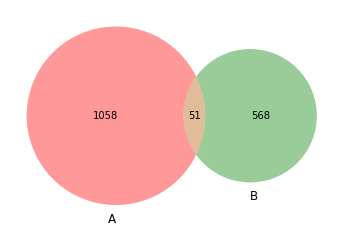

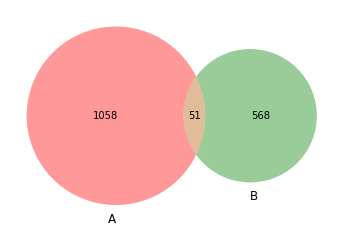

In [55]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# # First way to call the 2 group Venn diagram:
# venn2(subsets = (len(mono_geneset)- len(mono_geneset.intersection(poly_genes)), 
#                  len(poly_genes) - len(mono_geneset.intersection(poly_genes)), 
#                  len(mono_geneset.intersection(poly_genes))), set_labels = ('Monogenic Genes', 'Polygenic Genes'))
# plt.show()
 
# Second way
plt.figure()
venn2([mono_geneset,poly_genes])
plt.savefig('omim_enrichment/mono_poly_venn.svg')
plt.figure()
venn2([mono_geneset,poly_genes])
plt.show()

 basically in `2BR4_rna_brainspan_enrichment` found genes that are expressed in brain single cell then read those genes in/'


In [56]:
mono_poly_genes_rna_filt = list(pd.read_csv('/Users/mguo123/Google Drive/1_khavari/noncancer_project/miseq/novogene_071420/omim_enrichment/mono_poly_overlap_genelist_scrna_filt.txt',
            header=None).iloc[:,0].values)
print(len(mono_poly_genes_rna_filt))
print(mono_poly_genes_rna_filt)

69
['ABCC8', 'ACADM', 'ACO2', 'AGT', 'ANK3', 'AP3B2', 'APOPT1', 'ARL3', 'ATXN7', 'BANF1', 'BOLA3', 'CDK10', 'CEP85L', 'CHKB', 'CHRNA2', 'CNNM2', 'CNOT1', 'CYP2D6', 'DCC', 'DDHD2', 'EP300', 'FADS1', 'FADS2', 'FADS3', 'FANCA', 'FBXL4', 'FGFR1', 'FGFR3', 'FIBP', 'GNAI2', 'GPHN', 'HARS', 'IFT74', 'MADD', 'MANBA', 'MAP3K1', 'MARS', 'MFN2', 'MKL1', 'MMAB', 'MTHFD1', 'MTHFR', 'MYRF', 'NDUFA2', 'NDUFA6', 'NEK1', 'NFKB1', 'NT5C2', 'PARK7', 'PCCB', 'PIGQ', 'PPP2R3C', 'PREPL', 'PRMT7', 'RERE', 'RNASEH2C', 'RSRC1', 'SDCCAG8', 'SLC30A9', 'SPTLC1', 'SREBF1', 'SUFU', 'SZT2', 'TKT', 'TMX2', 'TPRKB', 'VARS2', 'WASF1', 'WDR73']


In [57]:
mono_poly_dz_df_filt_neuro['mono_geneset_str'] = mono_poly_dz_df_filt_neuro.mono_geneset.apply('|'.join)


In [48]:
# print(len(mono_poly_dz_df_filt_neuro))
gene_mono_poly_df = pd.DataFrame()
for gene in mono_poly_genes_rna_filt:
    gene_mono_df_sel = mono_poly_dz_df_filt_neuro[mono_poly_dz_df_filt_neuro.mono_geneset_str.str.contains(gene)]
    gene_mono_df_sel['gene_sel'] = gene
    print(gene,len(gene_mono_df_sel))
    gene_mono_poly_df = pd.concat([gene_mono_poly_df,gene_mono_df_sel ])

/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ABCC8 9
ACADM 2
ACO2 2
AGT 7
ANK3 3
AP3B2 4
APOPT1 3
ARL3 4
ATXN7 2
BANF1 2
BOLA3 2
CDK10 2
CEP85L 3
CHKB 2
CHRNA2 2
CNNM2 4
CNOT1 6
CYP2D6 4
DCC 6
DDHD2 2
EP300 4
FADS1 5
FADS2 5
FADS3 5
FANCA 2
FBXL4 2
FGFR1 6
FGFR3 6
FIBP 2
GNAI2 2
GPHN 2
HARS 2
IFT74 2
MADD 8
MANBA 2
MAP3K1 2
MARS 2
MFN2 6
MKL1 3
MMAB 3
MTHFD1 2
MTHFR 6
MYRF 2
NDUFA2 3
NDUFA6 3
NEK1 2
NFKB1 2
NT5C2 2
PARK7 2
PCCB 2
PIGQ 4
PPP2R3C 3
PREPL 3
PRMT7 2
RERE 2
RNASEH2C 2
RSRC1 2
SDCCAG8 2
SLC30A9 2
SPTLC1 3
SREBF1 3
SUFU 10
SZT2 4
TKT 3
TMX2 2
TPRKB 2
VARS2 4
WASF1 2
WDR73 2


In [62]:
gene_mono_poly_df_sel_cols = gene_mono_poly_df[['mono_dz', 'poly_dz_abbr','hypergeom_pval','gene_sel']]
gene_mono_poly_df_sel_cols.to_csv(os.path.join(save_dir, 'gene_mono_poly_df_sel_cols.csv'))
gene_mono_poly_df_sel_cols # throw intp cytoscape

,mono_dz,poly_dz_abbr,hypergeom_pval,gene_sel
20435,Diabetes mellitus transient neonatal,BPD,0.087097,ABCC8
44419,Diabetes mellitus permanent neonatal with or w...,SCZ,0.096921,ABCC8
44414,Diabetes mellitus noninsulin-dependent,SCZ,0.425251,ABCC8
1241,Diabetes mellitus noninsulin-dependent,NaN,0.538662,ABCC8
1247,Diabetes mellitus transient neonatal,NaN,0.263032,ABCC8
...,...,...,...,...
22327,Neurodevelopmental disorder with microcephaly ...,BPD,0.029912,VARS2
3096,Neurodevelopmental disorder with absent langua...,NaN,0.096711,WASF1
27081,Neurodevelopmental disorder with absent langua...,MDD,0.012842,WASF1
1644,Galloway-Mowat syndrome,NaN,0.066043,WDR73


In [56]:
print(len(gene_mono_poly_df_sel_cols.mono_dz.unique()))

78


In [68]:
gene_mono_poly_df_sel_cols_dzmerge = gene_mono_poly_df_sel_cols.dropna().groupby(['gene_sel','mono_dz']).agg({'poly_dz_abbr': lambda x: 
                                                              '|'.join(sorted(set(x))),
                                                              'hypergeom_pval':min}).reset_index()
gene_mono_poly_df_sel_cols_dzmerge.to_csv(os.path.join(save_dir, 'gene_mono_poly_df_sel_cols_dzmerge.csv'))


In [75]:
gene_df = pd.DataFrame(pd.Series(gene_mono_poly_df_sel_cols_dzmerge.gene_sel.unique()))
gene_df['node_type'] = 'gene'
gene_df.columns = ['node','node_type']
dz_df = pd.DataFrame(pd.Series(gene_mono_poly_df_sel_cols_dzmerge.mono_dz.unique()))
dz_df['node_type'] = 'disease'
dz_df.columns = ['node','node_type']
gene_dz_df = pd.concat([gene_df, dz_df])
gene_dz_df.to_csv(os.path.join(save_dir, 'gene_dz_df.csv'))
# + gene_mono_poly_df_sel_cols_dzmerge.genesel.unique() + 

In [60]:
gene_mono_poly_df_sel_cols.pivot_table(values='hypergeom_pval', index='mono_dz', columns='gene_sel', 
                         aggfunc=lambda x: len(x.unique())).fillna(0)

gene_sel,ABCC8,ACADM,ACO2,AGT,ANK3,AP3B2,APOPT1,ARL3,ATXN7,BANF1,...,SPTLC1,SREBF1,SUFU,SZT2,TKT,TMX2,TPRKB,VARS2,WASF1,WDR73
mono_dz,,,,,,,,,,,,,,,,,,,,,
46XY sex reversal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acyl-CoA dehydrogenase medium chain deficiency of,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aicardi-Goutieres syndrome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Al Kaissi syndrome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amyotrophic lateral sclerosis susceptibility to,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spastic paraplegia autosomal recessive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spinocerebellar ataxia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thauvin-Robinet-Faivre syndrome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
gene_mono_poly_df_sel_cols.pivot_table(values='hypergeom_pval', index='mono_dz', columns='poly_dz_abbr').fillna(0)

poly_dz_abbr,ADHD,BPD,GAD,MDD,OCD,PTSD,SCZ
mono_dz,,,,,,,
46XY sex reversal,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Acyl-CoA dehydrogenase medium chain deficiency of,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Aicardi-Goutieres syndrome,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Al Kaissi syndrome,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Amyotrophic lateral sclerosis susceptibility to,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
Spastic paraplegia autosomal recessive,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Spinocerebellar ataxia,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Thauvin-Robinet-Faivre syndrome,0.0,0.0,0.0,0.0,0.0,0.0,1.0
